In [ ]:
#PLEASE NOTE THAT DATA USED IN THE ANALYSIS BELOW
#IS NEITHER VERIFIED NOR RELIABLE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [ ]:
#NOW let's upload the data Colab in order to play around with it
from google.colab import files
uploaded=files.upload()
df = pd.read_csv('cancer_data.csv')


Saving cancer_data.csv to cancer_data.csv


In [ ]:
#lets SUMMARIZE all necessary info about data we have at our DISPOSAL
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB
None


In [ ]:
dataframe = pd.read_csv("cancer_data.csv")
print(dataframe.head())


   Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
0   58       1  16.085313        0            1          8.146251   
1   71       0  30.828784        0            1          9.361630   
2   48       1  38.785084        0            2          5.135179   
3   34       0  30.040295        0            0          9.502792   
4   62       1  35.479721        0            0          5.356890   

   AlcoholIntake  CancerHistory  Diagnosis  
0       4.148219              1          1  
1       3.519683              0          0  
2       4.728368              0          1  
3       2.044636              0          0  
4       3.309849              0          1  


In [ ]:
#NOW it is time for us to find out Alcohol Contribution as far as  Cancer is involved

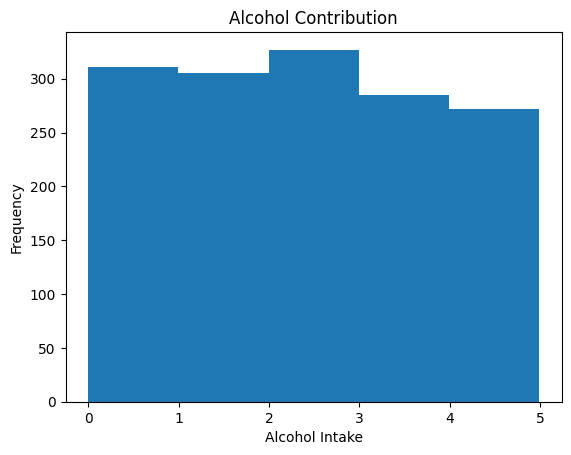

In [ ]:
plt.hist(dataframe['AlcoholIntake'],bins=5)
plt.title("Alcohol Contribution")
plt.xlabel("Alcohol Intake")
plt.ylabel("Frequency")
plt.show()


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


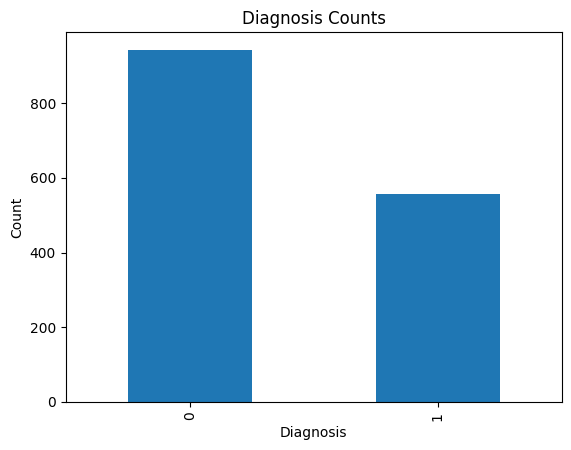

In [ ]:
diagnosis_counts = dataframe['Diagnosis'].value_counts()
diagnosis_counts.plot(kind='bar')
plt.title('Diagnosis Counts')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [ ]:
#whats the average age of individuals with and those without CANCER?
average_age_with_cancer = dataframe[dataframe['Diagnosis'] == 'Cancer']['Age'].mean()
average_age_without_cancer = dataframe[dataframe['Diagnosis'] != 'Cancer']['Age'].mean()

In [ ]:
print("Average Age with Cancer:", average_age_with_cancer)
print("Average Age without Cancer:", average_age_without_cancer)

Average Age with Cancer: nan
Average Age without Cancer: 50.32


In [ ]:
#CONCLUSION is that there is no really AVERAGE AGE for persons with no cancer as cancer diagnosis is spread ACCROSS ALL AGES

In [ ]:
#is there a CORRELATION between BMI and cancer diagnosis?

correlation = dataframe['BMI'].corr(dataframe['Diagnosis'] == 'Cancer')
print("Correlation between BMI and Cancer Diagnosis:", correlation)

Correlation between BMI and Cancer Diagnosis: nan


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


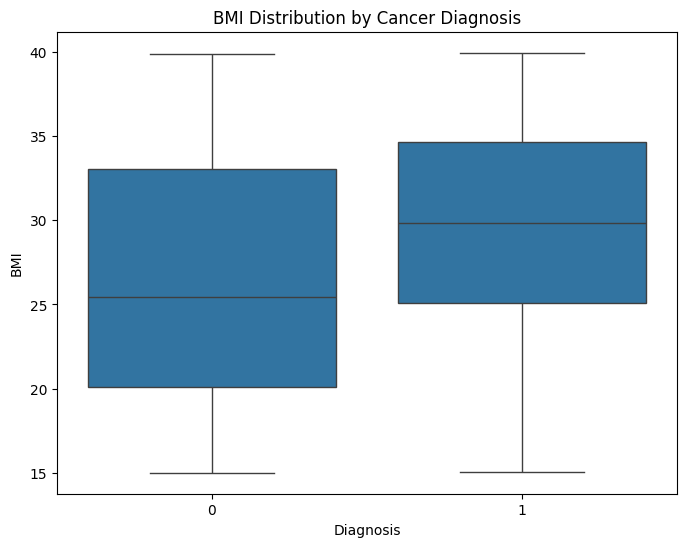

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='BMI', data=dataframe)
plt.title('BMI Distribution by Cancer Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('BMI')
plt.show()

In [ ]:
#CONCLUSION is that there no correlation between BMI and Cancer Dignosis

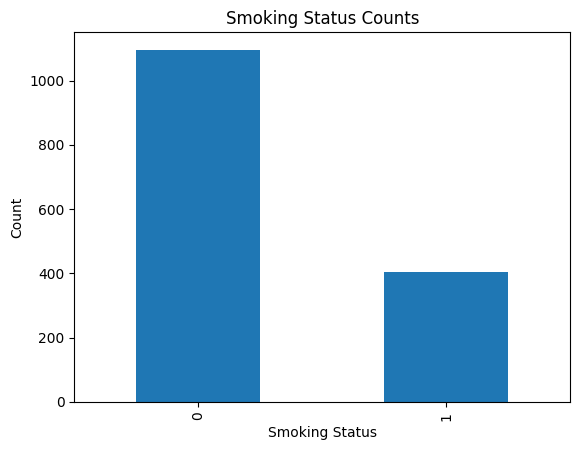

In [ ]:
#How does SMOKING status affect cancer diagnosis
smoking=dataframe['Smoking'].value_counts()
smoking.plot(kind='bar')
plt.title('Smoking Status Counts')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

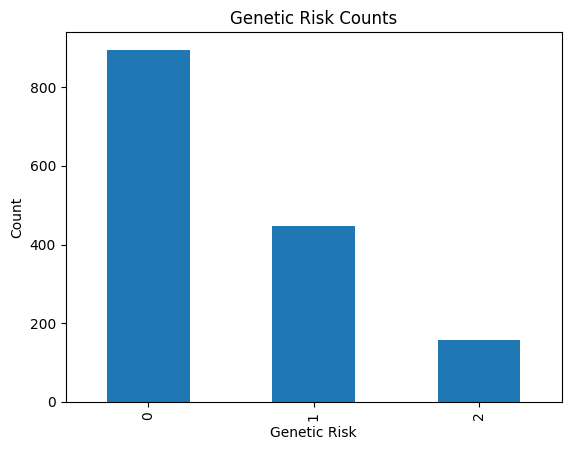

In [ ]:
#What is the relationship between Genetic Risk and Cancer Diagnosis
genetic_risk_counts = dataframe['GeneticRisk'].value_counts()
genetic_risk_counts.plot(kind='bar')
plt.title('Genetic Risk Counts')
plt.xlabel('Genetic Risk')
plt.ylabel('Count')
plt.show()

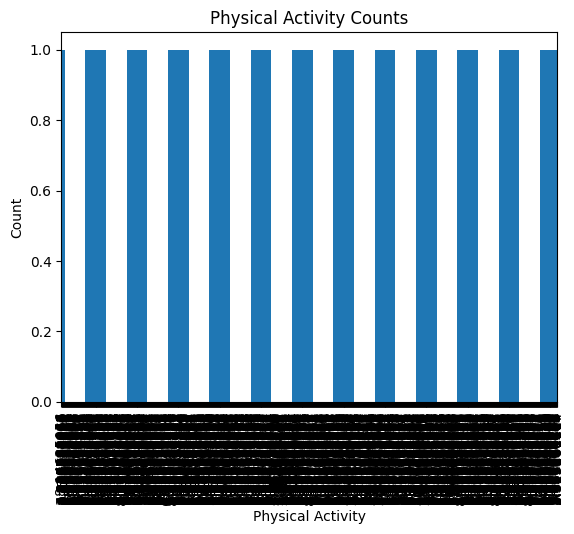

In [ ]:
#How does physical activity  correlate with cancer diagnosis?
physical_activity_counts = dataframe['PhysicalActivity'].value_counts()
physical_activity_counts.plot(kind='bar')
plt.title('Physical Activity Counts')
plt.xlabel('Physical Activity')
plt.ylabel('Count')
plt.show()

In [ ]:
#the above graph does not really answer our question so we will perform a HYPOTHESIS TEST,chi-square test to be precise

In [ ]:
from scipy.stats import chi2_contingency

# Contingency table
contingency_table = pd.crosstab(df['PhysicalActivity'], df['Diagnosis'])

# Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Interpretation
if p_value < 0.05:
  print("There is a statistically significant difference (p-value =", p_value,") in Physical Activity between those diagnosed with cancer and those who are not.")
else:
  print("There is not sufficient evidence (p-value =", p_value,") to show a statistically significant difference in Physical Activity based on cancer diagnosis.")

There is not sufficient evidence (p-value = 0.4878601322706867 ) to show a statistically significant difference in Physical Activity based on cancer diagnosis.


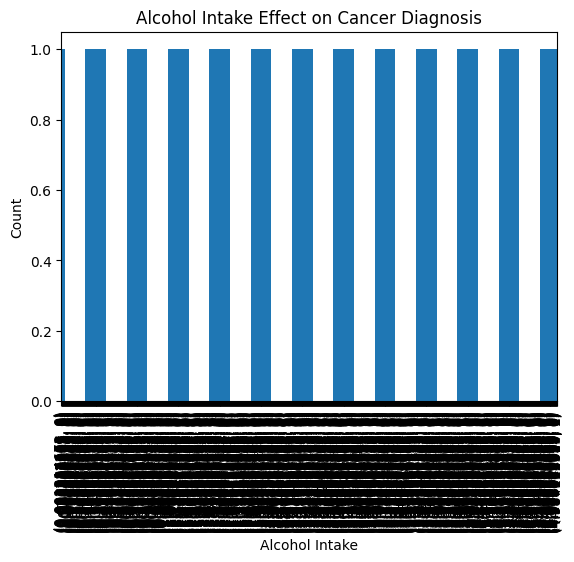

In [ ]:
#Is there a significant difference in Alcohol Intake between those diagnosed with cancer and those who are not
alcohol_intake_effect=df.groupby('AlcoholIntake')['Diagnosis'].value_counts()
alcohol_intake_effect.plot(kind='bar')
plt.title('Alcohol Intake Effect on Cancer Diagnosis')
plt.xlabel('Alcohol Intake')
plt.ylabel('Count')
plt.show()

In [ ]:
#the above graph does not really answer our question so we will perform a HYPOTHESIS TEST,chi-square test to be precise

In [ ]:
from scipy.stats import chi2_contingency

# Contingency table
contingency_table = pd.crosstab(df['AlcoholIntake'], df['Diagnosis'])

# Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Interpretation
if p_value < 0.05:
  print("There is a statistically significant difference (p-value =", p_value,") in alcohol intake between those diagnosed with cancer and those who are not.")
else:
  print("There is not sufficient evidence (p-value =", p_value,") to show a statistically significant difference in alcohol intake based on cancer diagnosis.")

There is not sufficient evidence (p-value = 0.4878601322706867 ) to show a statistically significant difference in alcohol intake based on cancer diagnosis.


In [ ]:
#THERE GOES!!! our answer in the above OUPTUT

In [ ]:
#What is the relationship between age,BMI and cancer diagnosis using a LOGISTICAL REGRESSSION model?
import statsmodels.api as sm
X = df[['Age', 'BMI']]
y = df['Diagnosis']
X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.622542
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1497
Method:                           MLE   Df Model:                            2
Date:                Tue, 08 Oct 2024   Pseudo R-squ.:                 0.05627
Time:                        11:49:15   Log-Likelihood:                -933.81
converged:                       True   LL-Null:                       -989.49
Covariance Type:            nonrobust   LLR p-value:                 6.592e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3173      0.291    -11.411      0.000      -3.887      -2.748
Age            0.0240      0.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


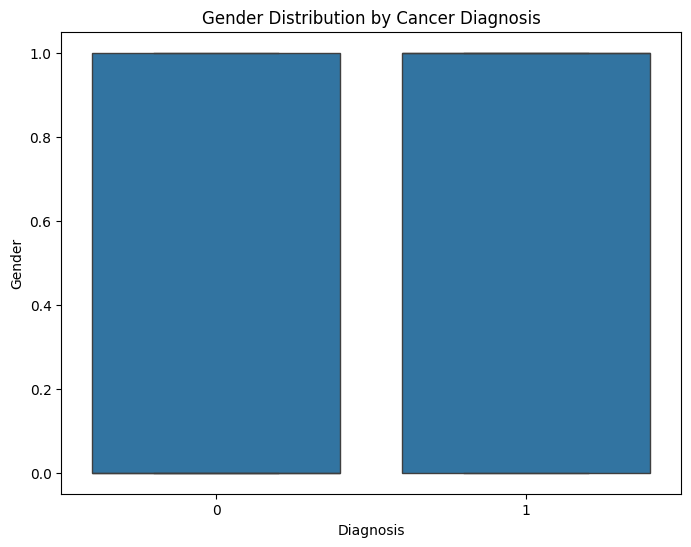

In [ ]:
#lets NOW look at Gender and Cancer Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='Gender', data=dataframe)
plt.title('Gender Distribution by Cancer Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Gender')
plt.show()

In [ ]:
#From the ABOVE output according to our data, chances of members of either getting diagnosis with cancer is equally shared

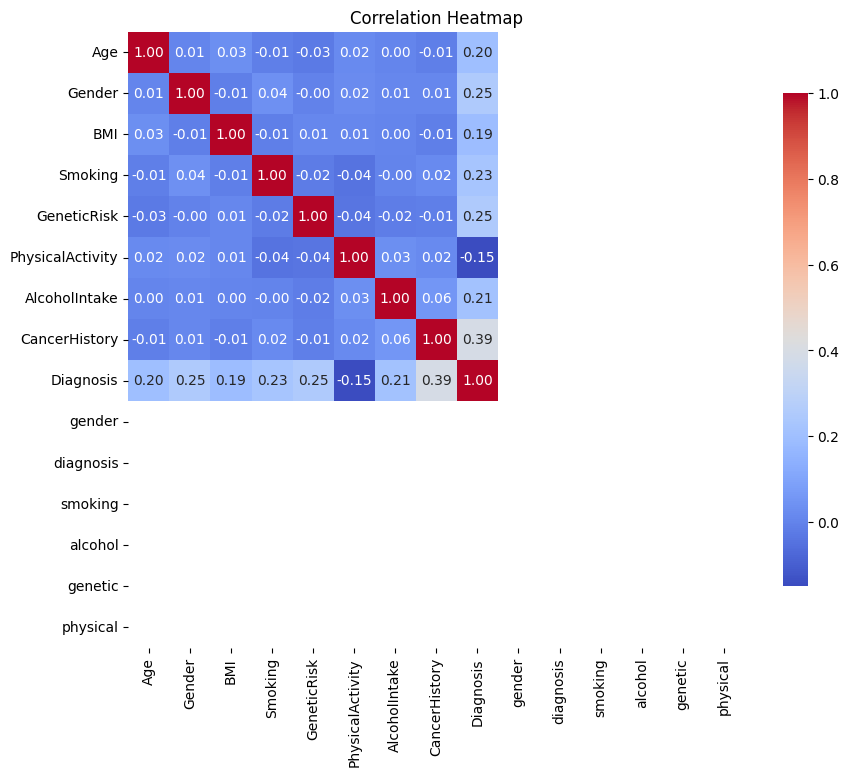

In [ ]:
#FINALLY lets have a CORRELATION HEATMAP for all these dataframes
dataframe['gender']=dataframe['Gender'].map({'Male':1,'Female':0})
dataframe['diagnosis']=dataframe['Diagnosis'].map({'Cancer':1,'No Cancer':0})
dataframe['smoking']=dataframe['Smoking'].map({'Yes':1,'No':0})
dataframe['alcohol']=dataframe['AlcoholIntake'].map({'Yes':1,'No':0})
dataframe['genetic']=dataframe['GeneticRisk'].map({'Yes':1,'No':0})
dataframe['physical']=dataframe['PhysicalActivity'].map({'Yes':1,'No':0})
dataframe.head()

correlation_matrix = dataframe.corr()
correlation_matrix

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink":.8})

plt.title('Correlation Heatmap')
plt.show()